# Car Price Prediction

In [69]:
import numpy as np # linear algebra
import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf
sns.set_style('whitegrid')
import os
%matplotlib inline 

#Importing Deep Learning Modules 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
data = pd.read_csv('bmw_pricing_challenge.csv')

In [3]:
data.head()

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
0,BMW,118,140411,100,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300,2018-01-01
1,BMW,M4,13929,317,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700,2018-02-01
2,BMW,320,183297,120,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200,2018-02-01
3,BMW,420,128035,135,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100,2018-02-01
4,BMW,425,97097,160,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400,2018-04-01


In [4]:
data.shape

(4843, 18)

In [5]:
data.isnull().sum()

maker_key            0
model_key            0
mileage              0
engine_power         0
registration_date    0
fuel                 0
paint_color          0
car_type             0
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
price                0
sold_at              0
dtype: int64

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mileage,4843.0,140962.799504,60196.740703,-64.0,102913.5,141080.0,175195.5,1000376.0
engine_power,4843.0,128.988230,38.993360,0.0,100.0,120.0,135.0,423.0
price,4843.0,15828.081767,9220.285684,100.0,10800.0,14200.0,18600.0,178500.0


In [7]:
data.dtypes

maker_key            object
model_key            object
mileage               int64
engine_power          int64
registration_date    object
fuel                 object
paint_color          object
car_type             object
feature_1              bool
feature_2              bool
feature_3              bool
feature_4              bool
feature_5              bool
feature_6              bool
feature_7              bool
feature_8              bool
price                 int64
sold_at              object
dtype: object

In [8]:
data['registration_date']=pd.to_datetime(data['registration_date'])
data['sold_at']=pd.to_datetime(data['sold_at'])

In [9]:
data[data['mileage']<0]

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
2938,BMW,640 Gran Coupé,-64,230,2017-03-01,diesel,black,sedan,True,True,False,True,False,False,True,True,75000,2018-04-01


In [12]:
data.at[2938, 'mileage'] = 64

In [13]:
data[data['mileage']==64]

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
2938,BMW,640 Gran Coupé,64,230,2017-03-01,diesel,black,sedan,True,True,False,True,False,False,True,True,75000,2018-04-01


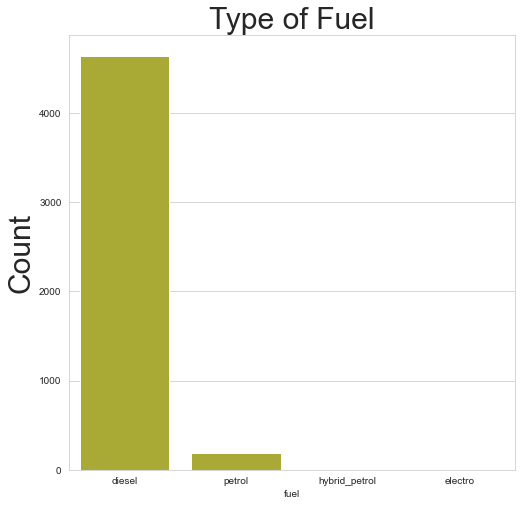

In [15]:
plt.figure(figsize=(8,8))
base_color=sns.color_palette()[8]
sns.countplot(data=data, x='fuel',color=base_color)
plt.title('Type of Fuel',fontsize=30)
plt.ylabel('Count',fontsize=30)

locs, labels = plt.xticks()


(array([0, 1, 2, 3]),
 [Text(0, 0, 'diesel'),
  Text(1, 0, 'petrol'),
  Text(2, 0, 'hybrid_petrol'),
  Text(3, 0, 'electro')])

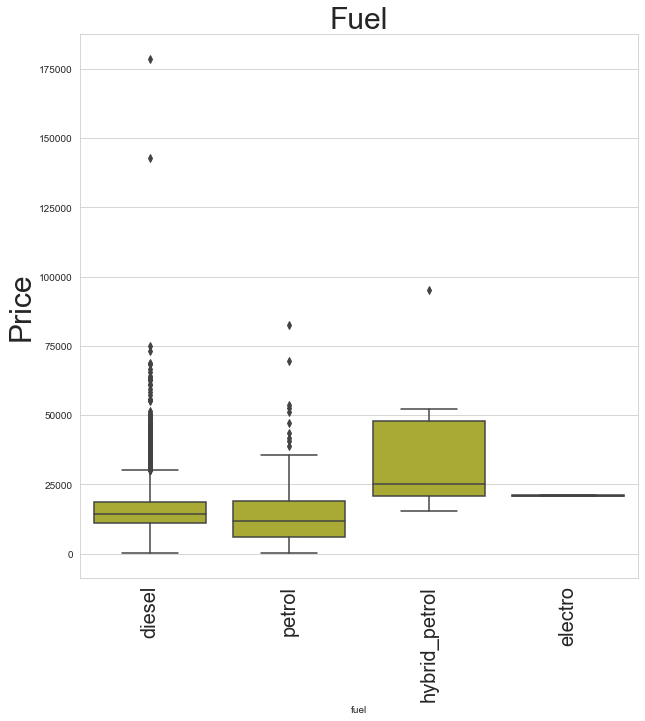

In [16]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data,x='fuel',y='price',color=base_color,order=data.fuel.value_counts().index);
plt.title('Fuel',fontsize=30)
plt.ylabel('Price',fontsize=30)
plt.xticks(fontsize=20,rotation=90)

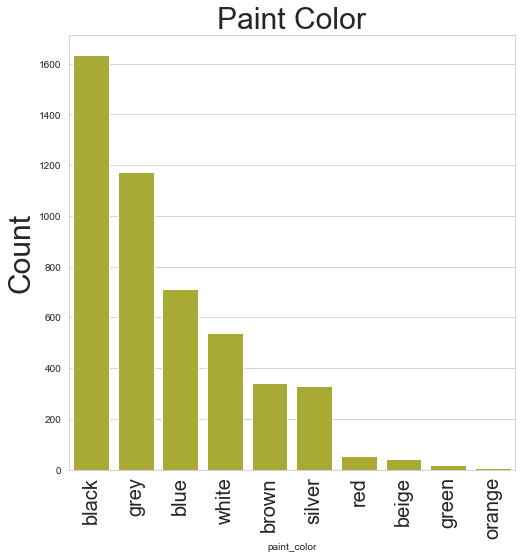

In [17]:
plt.figure(figsize=(8,8))
base_color=sns.color_palette()[8]
sns.countplot(data=data, x='paint_color',color=base_color,order=data.paint_color.value_counts().index)
plt.title('Paint Color',fontsize=30)
plt.ylabel('Count',fontsize=30)
plt.xticks(rotation=90,fontsize=20)

locs, labels = plt.xticks()

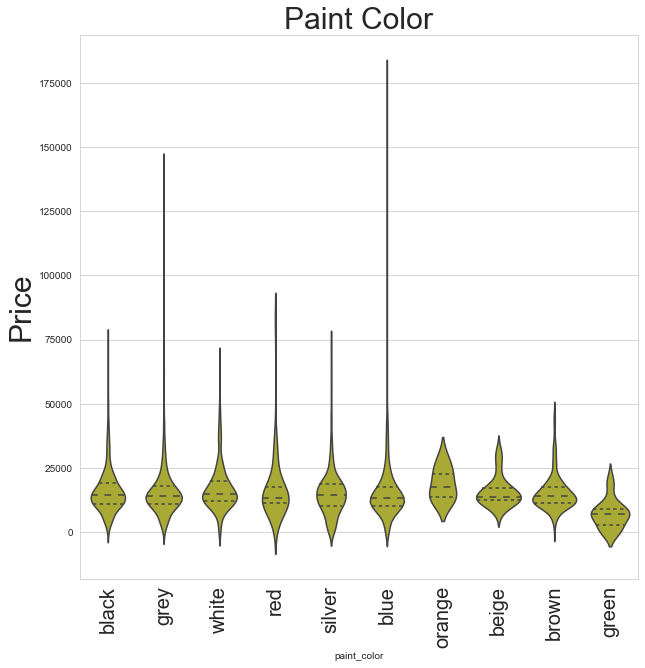

In [18]:
#Let see how the color is related to price in the resale market . THe data is has more points for black , grey and blue

plt.figure(figsize=(10,10));
sns.violinplot(data=data,x='paint_color',y='price',inner='quartile',color=base_color);
plt.ylabel('Price',fontsize=30);
#plt.xlabel('Paint Color',fontsize=30);
plt.title("Paint Color",fontsize=30);
plt.xticks(rotation=90,fontsize=20);

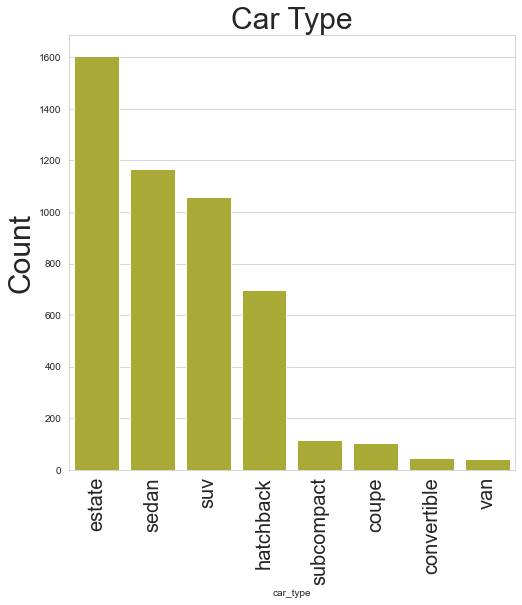

In [19]:
plt.figure(figsize=(8,8))
base_color=sns.color_palette()[8]
sns.countplot(data=data, x='car_type',color=base_color,order=data.car_type.value_counts().index)
plt.title('Car Type',fontsize=30)
plt.ylabel('Count',fontsize=30)
plt.xticks(rotation=90,fontsize=20)

locs, labels = plt.xticks()

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'estate'),
  Text(1, 0, 'sedan'),
  Text(2, 0, 'suv'),
  Text(3, 0, 'hatchback'),
  Text(4, 0, 'subcompact'),
  Text(5, 0, 'coupe'),
  Text(6, 0, 'convertible'),
  Text(7, 0, 'van')])

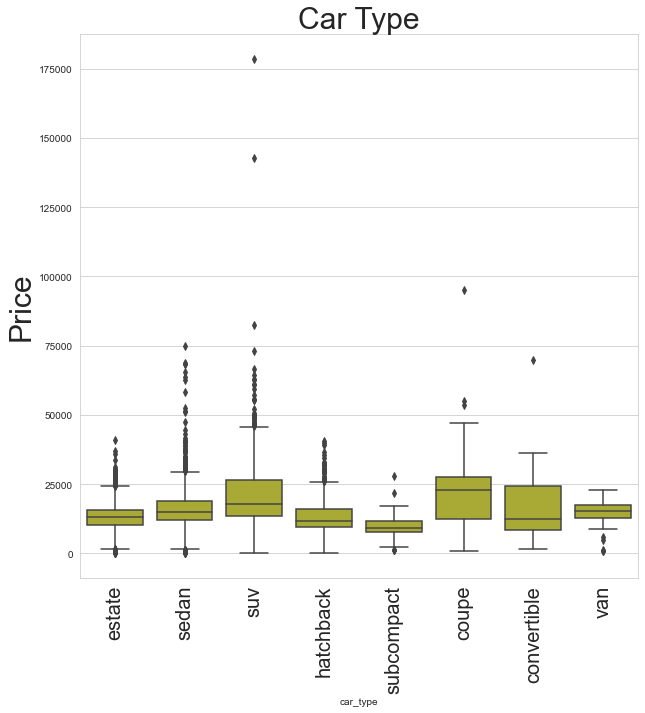

In [21]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data,x='car_type',y='price',color=base_color,order=data.car_type.value_counts().index);
plt.title('Car Type',fontsize=30)
plt.ylabel('Price',fontsize=30)
plt.xticks(fontsize=20,rotation=90)

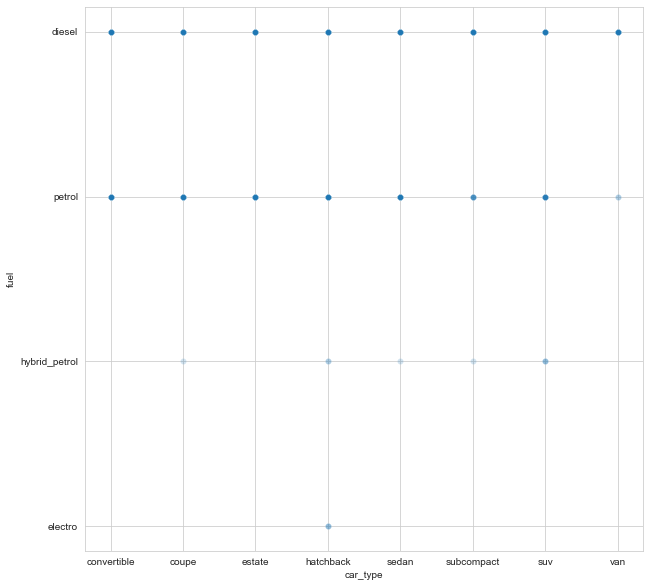

In [20]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=data,x='car_type',y='fuel',alpha=0.2,x_jitter=0.2);

In [23]:
#Creating a colum called as registration year 
data['registration_year']=data['registration_date'].dt.year

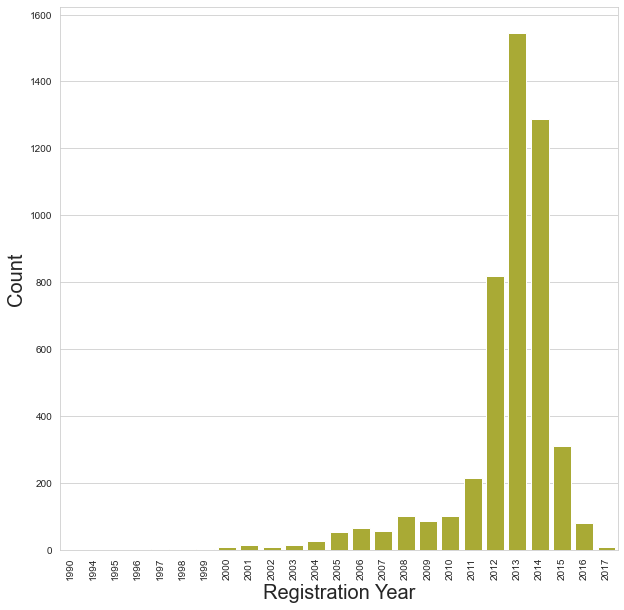

In [24]:
plt.figure(figsize=(10,10));
sns.countplot(data=data,x='registration_year',color=base_color);
plt.xticks(rotation=90);
plt.xlabel('Registration Year',fontsize=20);
plt.ylabel('Count',fontsize=20);

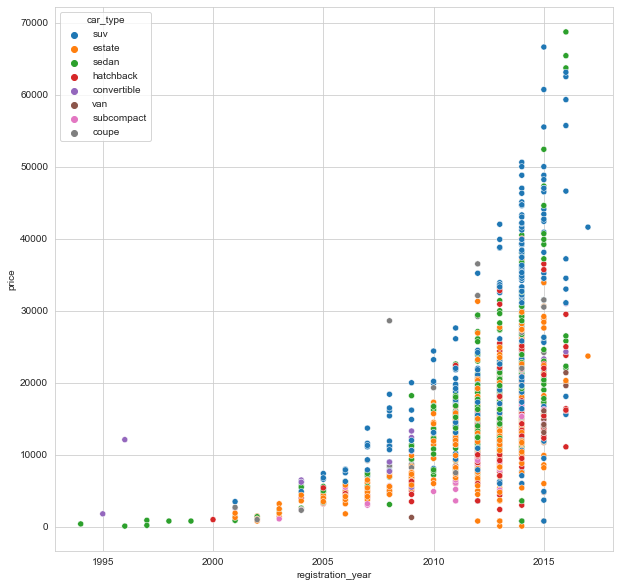

In [25]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=data.sample(2000),x='registration_year',y='price',hue='car_type');

In [26]:
data.dtypes

maker_key                    object
model_key                    object
mileage                       int64
engine_power                  int64
registration_date    datetime64[ns]
fuel                         object
paint_color                  object
car_type                     object
feature_1                      bool
feature_2                      bool
feature_3                      bool
feature_4                      bool
feature_5                      bool
feature_6                      bool
feature_7                      bool
feature_8                      bool
price                         int64
sold_at              datetime64[ns]
registration_year             int64
dtype: object

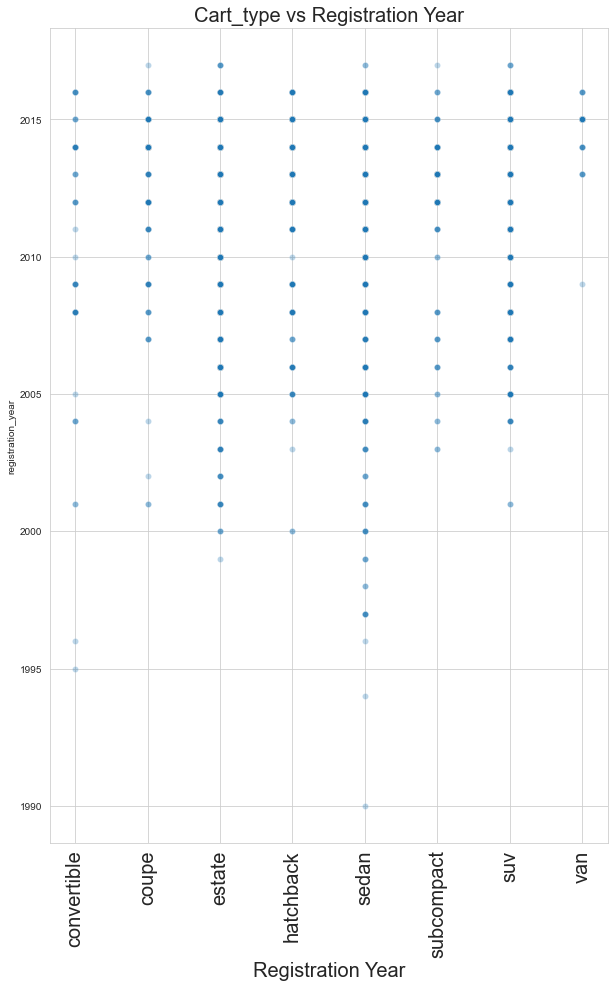

In [27]:
plt.figure(figsize=(10,15));
#sns.regplot(x="car_type",y="registration_date",data=data)
sns.scatterplot(data=data,x='car_type',y='registration_year',alpha=0.3);
plt.xticks(rotation=90,fontsize=20);
plt.xlabel('Car Type',fontsize=20);
plt.xlabel('Registration Year',fontsize=20);
plt.title('Cart_type vs Registration Year',fontsize=20);

# Model

In [28]:
# Fitting a neural network to only 8 boolean features 

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import r2_score


baseline=data[['feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','price']]


#Casting True/Fasle to 1/0 
baseline['feature_1']=baseline['feature_1'].astype('int')
baseline['feature_2']=baseline['feature_2'].astype('int')
baseline['feature_3']=baseline['feature_3'].astype('int')
baseline['feature_4']=baseline['feature_4'].astype('int')
baseline['feature_5']=baseline['feature_5'].astype('int')
baseline['feature_6']=baseline['feature_6'].astype('int')
baseline['feature_7']=baseline['feature_7'].astype('int')
baseline['feature_8']=baseline['feature_8'].astype('int')

columns_names=baseline.columns


#Scaling the dataframe 

sc = StandardScaler()
baseline = sc.fit_transform(baseline[columns_names])


#converting it back to dataframe 
baseline_scaled=pd.DataFrame(baseline,columns=columns_names)



X=baseline_scaled.drop(['price'],axis=1).values
y=baseline_scaled['price'].values.reshape(len(X),1)


print(X.shape,y.shape)



# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42)

(4843, 8) (4843, 1)


C:\Users\Mustafa\AppData\Local\Temp\ipykernel_14444\4219586174.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baseline['feature_1']=baseline['feature_1'].astype('int')
C:\Users\Mustafa\AppData\Local\Temp\ipykernel_14444\4219586174.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baseline['feature_2']=baseline['feature_2'].astype('int')
C:\Users\Mustafa\AppData\Local\Temp\ipykernel_14444\4219586174.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [31]:
#Baseline Model1

# Initialising the ANN
model_baseline = Sequential()

# Adding the input layer and the first hidden layer
model_baseline.add(Dense(units = 5, kernel_initializer = 'he_normal', activation = 'relu', input_dim = X.shape[1]))

# Adding the second hidden layer
model_baseline.add(Dense(units = 5, kernel_initializer = 'he_normal', activation = 'relu'))


# Adding the second hidden layer
#model_baseline.add(Dense(units = 8, kernel_initializer = 'he_normal', activation = 'relu'))


# Adding the output layer
model_baseline.add(Dense(units = 1, kernel_initializer = 'he_normal', activation = 'linear'))

# Compiling the ANN

sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model_baseline.compile(optimizer =sgd, loss = 'mean_squared_error',metrics=['MAE'])

# Fitting the ANN to the Training set
model_baseline.fit(X_train, y_train,validation_data=(X_test,y_test) , batch_size = 128, epochs = 500,verbose=0)



predictions=model_baseline.predict(X_test)

46/46 [==============================] - 0s 746us/step


In [33]:
model_baseline.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 5)                 45        
                                                                 
 dense_7 (Dense)             (None, 5)                 30        
                                                                 
 dense_8 (Dense)             (None, 1)                 6         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [34]:
print('Explained_varianve_score={}'.format( explained_variance_score(y_test,predictions)))
print('R-squared={}'.format( r2_score(y_test,predictions)))

Explained_varianve_score=0.3902864531832011
R-squared=0.3864718714739399


# Model 2

In [37]:
 data['vechile_days']=data['sold_at']-data['registration_date']
data['year_diff']=data['sold_at'].dt.year-data['registration_year']

In [47]:
data[data["price"]<10000]

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,...,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at,registration_year,vechile_days,year_diff
7,BMW,118,115560,105,2009-08-01,petrol,white,convertible,True,True,...,False,False,True,True,False,6100,2018-02-01,2009,3106 days,9
8,BMW,Z4,123886,125,2004-07-01,petrol,black,convertible,True,False,...,False,False,True,True,False,6200,2018-03-01,2004,4991 days,14
15,BMW,120,208945,130,2008-04-01,diesel,grey,convertible,True,True,...,False,True,False,True,True,8300,2018-04-01,2008,3652 days,10
17,BMW,650,24521,270,2008-01-01,petrol,grey,convertible,True,False,...,False,False,False,True,False,9200,2018-09-01,2008,3896 days,10
19,BMW,Z4,128940,110,2008-03-01,petrol,black,convertible,True,False,...,False,False,False,True,False,7700,2018-05-01,2008,3713 days,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4803,BMW,216,31079,85,2015-11-01,diesel,black,van,False,True,...,False,False,False,False,False,4800,2018-03-01,2015,851 days,3
4806,BMW,218,118323,110,2014-09-01,diesel,white,van,False,False,...,False,False,False,False,False,800,2018-02-01,2014,1249 days,4
4810,BMW,216 Active Tourer,193657,85,2015-03-01,diesel,silver,van,False,False,...,False,False,False,True,False,8900,2018-09-01,2015,1280 days,3
4812,BMW,218,120849,110,2015-06-01,diesel,blue,van,False,False,...,False,False,False,False,True,6000,2018-04-01,2015,1035 days,3


In [49]:
data[data["mileage"]<4000]

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,...,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at,registration_year,vechile_days,year_diff
471,BMW,318,3142,100,2016-09-01,diesel,blue,estate,True,True,...,False,False,False,True,False,21400,2018-02-01,2016,518 days,2
781,BMW,318,3478,100,2016-09-01,diesel,blue,estate,True,True,...,False,False,False,True,False,21400,2018-03-01,2016,546 days,2
2409,BMW,420 Gran Coupé,476,120,2014-05-01,diesel,blue,hatchback,True,True,...,False,False,True,True,True,30300,2018-08-01,2014,1553 days,4
2938,BMW,640 Gran Coupé,64,230,2017-03-01,diesel,black,sedan,True,True,...,True,False,False,True,True,75000,2018-04-01,2017,396 days,1
3687,BMW,116,2399,85,2016-11-01,diesel,white,subcompact,False,False,...,False,False,False,True,False,17300,2018-03-01,2016,485 days,2
3935,BMW,X5,706,155,2017-07-01,diesel,black,suv,True,True,...,True,True,True,True,True,41600,2018-02-01,2017,215 days,1
4146,BMW,X6 M,2970,423,2016-04-01,petrol,red,suv,True,True,...,False,False,False,True,True,82400,2018-04-01,2016,730 days,2
4372,BMW,X5,612,183,2016-10-01,diesel,black,suv,True,True,...,False,False,False,True,True,49100,2018-06-01,2016,608 days,2


In [50]:
# I am selecting the features below for fitting the price model .
# Dropping the fuel type as it is screwed towards the diseal fuel 
# Also dropping maker_key as its all BMW  and model_key as that is captured in car_type 

data=data[data.price<100000] # Removing price outliers 
data=data[data.mileage<400000] #Removing mileage outliers . In total 8 rows removed 

features=data[['mileage','engine_power','paint_color','car_type','feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','price','vechile_days']]

#Creating Dummy Variables 
features=pd.get_dummies(features,drop_first=True)


features['vechile_days']=features['vechile_days'].values.astype('int')
features['feature_1']=features['feature_1'].astype('int')
features['feature_2']=features['feature_2'].astype('int')
features['feature_3']=features['feature_3'].astype('int')
features['feature_4']=features['feature_4'].astype('int')
features['feature_5']=features['feature_5'].astype('int')
features['feature_6']=features['feature_6'].astype('int')
features['feature_7']=features['feature_7'].astype('int')
features['feature_8']=features['feature_8'].astype('int')

columns_names=features.columns

sc = StandardScaler()
features = sc.fit_transform(features[columns_names])

#converting it back to dataframe 
features_scales=pd.DataFrame(features,columns=columns_names)


X=features_scales.drop(['price'],axis=1).values
y=features_scales['price'].values.reshape(len(X),1)



# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =42)

In [51]:
print(X.shape,y.shape)

(4835, 27) (4835, 1)


In [108]:
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(units = 12, kernel_initializer = 'he_normal', activation = 'relu', input_dim = X.shape[1]))

# Adding the second hidden layer
model.add(Dense(units = 12, kernel_initializer = 'he_normal', activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 12, kernel_initializer = 'he_normal', activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1, kernel_initializer = 'he_normal', activation = 'linear'))

# Compiling the ANN

sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer =sgd, loss = 'mean_squared_error',metrics=['MAE'])

# Fitting the ANN to the Training set
model.fit(X_train, y_train,validation_data=(X_test,y_test) , batch_size = 128, epochs = 350,verbose=0)

C:\Users\Mustafa\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [109]:
model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_84 (Dense)            (None, 12)                336       
                                                                 
 dense_85 (Dense)            (None, 12)                156       
                                                                 
 dense_86 (Dense)            (None, 12)                156       
                                                                 
 dense_87 (Dense)            (None, 1)                 13        
                                                                 
Total params: 661
Trainable params: 661
Non-trainable params: 0
_________________________________________________________________


In [110]:
predictions=model.predict(X_test)
print('Explained_varianve_score={}'.format( explained_variance_score(y_test,predictions)))
print('R-squared={}'.format( r2_score(y_test,predictions)))

38/38 [==============================] - 0s 836us/step
Explained_varianve_score=0.7237497804718028
R-squared=0.7236178114169549


# Deneme

In [88]:
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(units = 27, activation = 'relu', input_dim = X.shape[1]))

# Adding the second hidden layer
model.add(Dense(units = 27, activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1, activation = 'linear'))

# Compiling the ANN

adam = tf.optimizers.Adam(learning_rate=0.001, decay=1e-6)
model.compile(optimizer ="adam", loss = 'mean_squared_error')

# Fitting the ANN to the Training set
model.fit(X_train, y_train,validation_data=(X_test,y_test) , batch_size = 128, epochs = 350,verbose=0)

In [89]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 27)                756       
                                                                 
 dense_64 (Dense)            (None, 27)                756       
                                                                 
 dense_65 (Dense)            (None, 1)                 28        
                                                                 
Total params: 1,540
Trainable params: 1,540
Non-trainable params: 0
_________________________________________________________________


In [90]:
predictions=model.predict(X_test)
print('Explained_varianve_score={}'.format( explained_variance_score(y_test,predictions)))
print('R-squared={}'.format( r2_score(y_test,predictions)))

38/38 [==============================] - 0s 862us/step
Explained_varianve_score=0.6668941771560275
R-squared=0.6668937107230064


# Deneme 2

In [95]:
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(units = 27, activation = 'relu', input_dim = X.shape[1]))

# Adding the second hidden layer
model.add(Dense(units = 27, activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 27, activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1, activation = 'linear'))

# Compiling the ANN

sgd = tf.optimizers.SGD(learning_rate=0.001,nesterov = True)
model.compile(optimizer =sgd, loss = 'mean_squared_error')

# Fitting the ANN to the Training set
model.fit(X_train, y_train,validation_data=(X_test,y_test) , batch_size = 128, epochs = 350,verbose=1)

Epoch 1/350
29/29 [==============================] - 0s 6ms/step - loss: 1.0571 - val_loss: 0.9615
Epoch 2/350
29/29 [==============================] - 0s 2ms/step - loss: 1.0091 - val_loss: 0.9224
Epoch 3/350
29/29 [==============================] - 0s 2ms/step - loss: 0.9702 - val_loss: 0.8891
Epoch 4/350
29/29 [==============================] - 0s 2ms/step - loss: 0.9360 - val_loss: 0.8589
Epoch 5/350
29/29 [==============================] - 0s 2ms/step - loss: 0.9041 - val_loss: 0.8302
Epoch 6/350
29/29 [==============================] - 0s 2ms/step - loss: 0.8738 - val_loss: 0.8035
Epoch 7/350
29/29 [==============================] - 0s 2ms/step - loss: 0.8455 - val_loss: 0.7777
Epoch 8/350
29/29 [==============================] - 0s 2ms/step - loss: 0.8178 - val_loss: 0.7532
Epoch 9/350
29/29 [==============================] - 0s 2ms/step - loss: 0.7914 - val_loss: 0.7291
Epoch 10/350
29/29 [==============================] - 0s 2ms/step - loss: 0.7650 - val_loss: 0.7058
Epoch 11/

In [96]:
predictions=model.predict(X_test)
print('Explained_variance_score={}'.format( explained_variance_score(y_test,predictions)))
print('R-squared={}'.format( r2_score(y_test,predictions)))

38/38 [==============================] - 0s 863us/step
Explained_variance_score=0.6954624442157417
R-squared=0.6952808596993726
